# Starter API Access Tunnel
---

## Imports

In [5]:
# Dependencies
import datetime as dt
import requests
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint

#import api_keys

In [6]:
fema_decl = pd.read_csv('DisasterDeclarationsSummaries.csv', low_memory = False)
fema_decl.head(5)

,femaDeclarationString,disasterNumber,state,declarationType,declarationDate,fyDeclared,incidentType,declarationTitle,ihProgramDeclared,iaProgramDeclared,...,placeCode,designatedArea,declarationRequestNumber,lastIAFilingDate,incidentId,region,designatedIncidentTypes,lastRefresh,hash,id
0,FM-5530-NV,5530,NV,FM,2024-08-12T00:00:00.000Z,2024,Fire,GOLD RANCH FIRE,0,0,...,99031,Washoe (County),24123,NaN,2024081201,9,R,2024-08-27T18:22:14.800Z,5d07e7c51bb300bfbec94a699a1e1ab1d61a97cd,f15a7a79-f1c3-41bb-8a5c-c05fbae34423
1,FM-5529-OR,5529,OR,FM,2024-08-09T00:00:00.000Z,2024,Fire,LEE FALLS FIRE,0,0,...,99067,Washington (County),24122,NaN,2024081001,10,R,2024-08-27T18:22:14.800Z,ae87cf3c6ed795015b714af7166c7c295b2b67c7,09e3f81a-5e16-4b72-b317-1c64e0cfa59c
2,FM-5528-OR,5528,OR,FM,2024-08-06T00:00:00.000Z,2024,Fire,ELK LANE FIRE,0,0,...,99031,Jefferson (County),24116,NaN,2024080701,10,R,2024-08-27T18:22:14.800Z,432cf0995c47e3895cea696ede5621b810460501,59983f89-30bf-4888-b21b-62e8d57d9aac
3,FM-5527-OR,5527,OR,FM,2024-08-02T00:00:00.000Z,2024,Fire,MILE MARKER 132 FIRE,0,0,...,99017,Deschutes (County),24111,NaN,2024080301,10,R,2024-08-27T18:22:14.800Z,2f21d90cb6bc64b0d4121aa3f18d852bbb4b11fa,8d13ecf0-bc2f-496b-8c9f-b2e73da832a0
4,FM-5522-CA,5522,CA,FM,2024-07-27T00:00:00.000Z,2024,Fire,BOREL FIRE,0,0,...,99029,Kern (County),24102,NaN,2024072701,9,R,2024-08-27T18:22:14.800Z,51ec819011c936f387edf10b9d5839b35419ca95,9b73e19b-d326-4992-8da1-7e658d97607c


In [7]:
# Removing unwanted/unusable columns
fema_decl_clean = fema_decl[
    [
        'disasterNumber', 'declarationRequestNumber', 'declarationTitle', 'incidentType', 
        'declarationType', 'designatedArea', 'state', 'region', 'declarationDate', 
        'incidentBeginDate', 'tribalRequest', 'ihProgramDeclared', 'iaProgramDeclared', 
        'paProgramDeclared', 'hmProgramDeclared'
    ]
].copy()
fema_decl_clean['declarationDate'] = fema_decl_clean[
    'declarationDate'
    ].str.slice_replace(10)
fema_decl_clean['incidentBeginDate'] = fema_decl_clean[
    'incidentBeginDate'
    ].str.slice_replace(10)
fema_decl_clean

,disasterNumber,declarationRequestNumber,declarationTitle,incidentType,declarationType,designatedArea,state,region,declarationDate,incidentBeginDate,tribalRequest,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared
0,5530,24123,GOLD RANCH FIRE,Fire,FM,Washoe (County),NV,9,2024-08-12,2024-08-11,0,0,0,1,1
1,5529,24122,LEE FALLS FIRE,Fire,FM,Washington (County),OR,10,2024-08-09,2024-08-08,0,0,0,1,1
2,5528,24116,ELK LANE FIRE,Fire,FM,Jefferson (County),OR,10,2024-08-06,2024-08-04,0,0,0,1,1
3,5527,24111,MILE MARKER 132 FIRE,Fire,FM,Deschutes (County),OR,10,2024-08-02,2024-08-02,0,0,0,1,1
4,5522,24102,BOREL FIRE,Fire,FM,Kern (County),CA,9,2024-07-27,2024-07-25,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67351,9,53010,FLOOD,Flood,DR,Statewide,TX,6,1953-06-19,1953-06-19,0,0,1,1,1
67352,8,53008,FLOOD,Flood,DR,Statewide,IA,7,1953-06-11,1953-06-11,0,0,1,1,1
67353,7,53009,TORNADO,Tornado,DR,Statewide,MA,1,1953-06-11,1953-06-11,0,0,1,1,1
67354,2,53003,TORNADO & HEAVY RAINFALL,Tornado,DR,Statewide,TX,6,1953-05-15,1953-05-15,0,0,1,1,1


In [8]:
# Unique FEMA Disaster Types
disaster_types = fema_decl_clean['incidentType'].unique()
pprint(disaster_types)

array(['Fire', 'Severe Storm', 'Straight-Line Winds', 'Flood',
       'Winter Storm', 'Hurricane', 'Tornado', 'Mud/Landslide',
       'Tropical Storm', 'Snowstorm', 'Earthquake', 'Coastal Storm',
       'Other', 'Severe Ice Storm', 'Biological', 'Dam/Levee Break',
       'Typhoon', 'Volcanic Eruption', 'Freezing', 'Toxic Substances',
       'Chemical', 'Terrorist', 'Drought', 'Human Cause',
       'Fishing Losses', 'Tsunami'], dtype=object)


In [9]:
disaster_natural = pd.DataFrame(
    {
        'incidentType': [
            'Fire', 'Severe Storm', 'Straight-Line Winds', 
            'Flood', 'Winter Storm', 'Hurricane', 'Tornado',
            'Mud/Landslide', 'Tropical Storm', 'Snowstorm', 
            'Earthquake', 'Coastal Storm', 'Severe Ice Storm', 
            'Typhoon', 'Volcanic Eruption', 'Freezing', 
            'Drought', 'Tsunami'
        ]
    }
)

In [10]:
# Filter for just natural disaster types
fema_disasters = pd.merge(fema_decl_clean, disaster_natural, how = 'right', on = 'incidentType')
# fema_disasters = fema_disasters.rename(
#     columns = {
#         'disasterNumber': 'disaster_number', 'designatedArea': 'area',
#         'declarationRequestNumber': 'request_number', 'declarationTitle': 'title',
#         'incidentType': 'disaster_type''

#     }
# )
display(fema_disasters)

,disasterNumber,declarationRequestNumber,declarationTitle,incidentType,declarationType,designatedArea,state,region,declarationDate,incidentBeginDate,tribalRequest,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared
0,5530,24123,GOLD RANCH FIRE,Fire,FM,Washoe (County),NV,9,2024-08-12,2024-08-11,0,0,0,1,1
1,5529,24122,LEE FALLS FIRE,Fire,FM,Washington (County),OR,10,2024-08-09,2024-08-08,0,0,0,1,1
2,5528,24116,ELK LANE FIRE,Fire,FM,Jefferson (County),OR,10,2024-08-06,2024-08-04,0,0,0,1,1
3,5527,24111,MILE MARKER 132 FIRE,Fire,FM,Deschutes (County),OR,10,2024-08-02,2024-08-02,0,0,0,1,1
4,5522,24102,BOREL FIRE,Fire,FM,Kern (County),CA,9,2024-07-27,2024-07-25,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59096,1967,11042,TSUNAMI WAVES,Tsunami,DR,Honolulu (County),HI,9,2011-04-08,2011-03-11,0,0,0,1,1
59097,1967,11042,TSUNAMI WAVES,Tsunami,DR,Maui (County),HI,9,2011-04-08,2011-03-11,0,0,0,1,1
59098,1964,11029,TSUNAMI WAVE SURGE,Tsunami,DR,Coos (County),OR,10,2011-03-25,2011-03-11,0,0,0,1,1
59099,1964,11029,TSUNAMI WAVE SURGE,Tsunami,DR,Curry (County),OR,10,2011-03-25,2011-03-11,0,0,0,1,1


In [11]:
earliest_declaration_year = fema_disasters["declarationDate"].min()
earliest_declaration_year

'1953-05-02'

In [12]:
latest_declaration_year = fema_disasters["declarationDate"].max()
latest_declaration_year

'2025-01-08'

In [13]:
total_of_natural_disaster = fema_disasters["incidentType"].count()
total_of_natural_disaster

59101

In [14]:
# Counts of declaration types 
# DR = Major Disasters, EM = Emergency Declatation, FM = Fire Management)
# For more info see README (in progress)
fema_disasters['declarationType'].value_counts()

declarationType
DR    41116
EM    15991
FM     1994
Name: count, dtype: int64

In [15]:
# Counts of natural disaster types
fema_disasters['incidentType'].value_counts()

incidentType
Severe Storm           18399
Hurricane              13721
Flood                  11093
Fire                    3759
Snowstorm               3707
Severe Ice Storm        2942
Tornado                 1623
Drought                 1292
Tropical Storm          1047
Coastal Storm            637
Freezing                 301
Earthquake               228
Typhoon                  130
Winter Storm             117
Volcanic Eruption         51
Mud/Landslide             43
Tsunami                    9
Straight-Line Winds        2
Name: count, dtype: int64

In [16]:
# Validating no NaNs
fema_disasters.count()

disasterNumber              59101
declarationRequestNumber    59101
declarationTitle            59101
incidentType                59101
declarationType             59101
designatedArea              59101
state                       59101
region                      59101
declarationDate             59101
incidentBeginDate           59101
tribalRequest               59101
ihProgramDeclared           59101
iaProgramDeclared           59101
paProgramDeclared           59101
hmProgramDeclared           59101
dtype: int64

In [17]:
# Filter: Natural disasters per State
fema_disasters['state'].value_counts()

state
TX    4779
FL    2635
KY    2554
MO    2534
LA    2398
GA    2333
VA    2308
OK    2305
NC    2110
PR    1947
MS    1777
IA    1719
KS    1607
AL    1603
CA    1557
TN    1532
AR    1472
MN    1406
NE    1336
ND    1280
IN    1279
NY    1278
SD    1181
WV    1148
PA    1118
IL    1109
OH    1102
SC    1039
WA     902
WI     725
MI     595
NJ     556
OR     536
CO     531
MT     507
ME     426
MD     399
NM     380
VT     377
MA     365
NH     300
ID     276
AZ     271
CT     245
AK     211
NV     198
UT     183
RI     106
HI      97
WY      86
VI      79
MP      67
AS      66
MH      53
DE      47
FM      31
GU      20
DC      19
PW       1
Name: count, dtype: int64

In [18]:
# Filter: Natural disasters per hit area
fema_disasters['designatedArea'].value_counts()

designatedArea
Washington (County)                          510
Jefferson (County)                           462
Statewide                                    450
Jackson (County)                             450
Franklin (County)                            441
                                            ... 
Southern Ute Indian Reservation                1
Ute Mountain Indian Reservation (Also NM)      1
Nondalton (ANV/ANVSA)                          1
Salt River Pima-Maricopa Indian Community      1
Namorik (County-equivalent)                    1
Name: count, Length: 2201, dtype: int64

In [19]:
# Extract decleration_year from declarationDate

declarationDate = fema_disasters["declarationDate"]
df= pd.DataFrame(declarationDate)
df["declarationDate"] = pd.to_datetime(df["declarationDate"])
df["declaration_year"] = df["declarationDate"].dt.year
print(df)

# Count disasters by year
#yearly_disasters = ["declaration_year"].value_counts().sort_index()

# Plot trends over time
# plt.plot(yearly_disasters.index, yearly_disasters.values, marker='o')
# plt.title("Number of Disasters Over Time")
# plt.xlabel("Year")
# plt.ylabel("Count of Disasters")
# plt.grid()
# plt.show()

      declarationDate  declaration_year
0          2024-08-12              2024
1          2024-08-09              2024
2          2024-08-06              2024
3          2024-08-02              2024
4          2024-07-27              2024
...               ...               ...
59096      2011-04-08              2011
59097      2011-04-08              2011
59098      2011-03-25              2011
59099      2011-03-25              2011
59100      2011-03-25              2011

[59101 rows x 2 columns]


In [20]:
declaration_year = df["declaration_year"]
declaration_year.head()

0    2024
1    2024
2    2024
3    2024
4    2024
Name: declaration_year, dtype: int32

In [21]:
#adding declaration_year to fema_disasters data set 
fema_disasters["declaration_year"] = df["declaration_year"]
fema_disasters.head()

,disasterNumber,declarationRequestNumber,declarationTitle,incidentType,declarationType,designatedArea,state,region,declarationDate,incidentBeginDate,tribalRequest,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,declaration_year
0,5530,24123,GOLD RANCH FIRE,Fire,FM,Washoe (County),NV,9,2024-08-12,2024-08-11,0,0,0,1,1,2024
1,5529,24122,LEE FALLS FIRE,Fire,FM,Washington (County),OR,10,2024-08-09,2024-08-08,0,0,0,1,1,2024
2,5528,24116,ELK LANE FIRE,Fire,FM,Jefferson (County),OR,10,2024-08-06,2024-08-04,0,0,0,1,1,2024
3,5527,24111,MILE MARKER 132 FIRE,Fire,FM,Deschutes (County),OR,10,2024-08-02,2024-08-02,0,0,0,1,1,2024
4,5522,24102,BOREL FIRE,Fire,FM,Kern (County),CA,9,2024-07-27,2024-07-25,0,0,0,1,1,2024


In [22]:
#Count Severe Stroms trend by year 

sever_storms_by_year = fema_disasters.groupby("declaration_year")["incidentType"].value_counts().sort_index()
sever_storms_by_year

declaration_year  incidentType  
1953              Fire                1
                  Flood               5
                  Tornado             6
1954              Earthquake          1
                  Flood               7
                                   ... 
2024              Tornado            51
                  Tropical Storm    928
                  Winter Storm       37
2025              Fire                8
                  Severe Storm       15
Name: count, Length: 476, dtype: int64

In [23]:
fema_disasters["incidentType"].value_counts()

incidentType
Severe Storm           18399
Hurricane              13721
Flood                  11093
Fire                    3759
Snowstorm               3707
Severe Ice Storm        2942
Tornado                 1623
Drought                 1292
Tropical Storm          1047
Coastal Storm            637
Freezing                 301
Earthquake               228
Typhoon                  130
Winter Storm             117
Volcanic Eruption         51
Mud/Landslide             43
Tsunami                    9
Straight-Line Winds        2
Name: count, dtype: int64

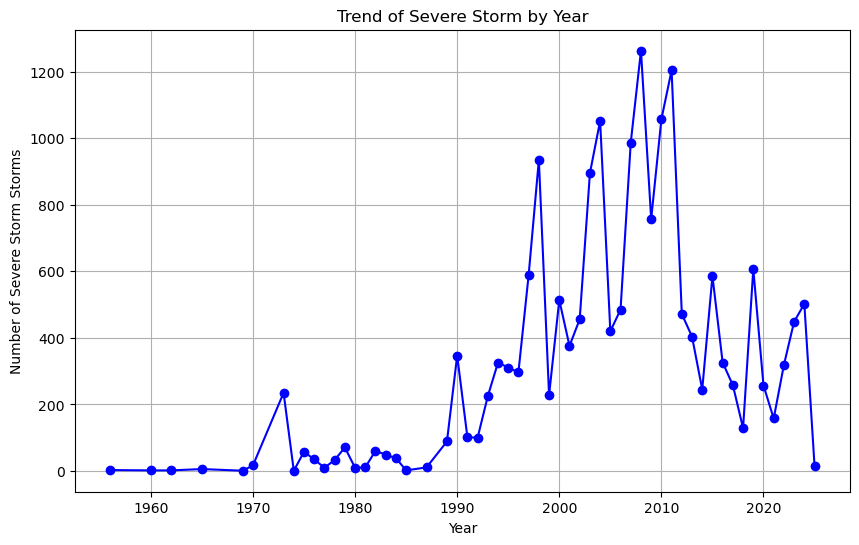

In [24]:
# Count Severe Storm data by year
# Your original code, generating the count of incident types by year
sever_storms_by_year = fema_disasters.groupby("declaration_year")["incidentType"].value_counts().sort_index()

# Filter for 'Severe Storm' and create a new series for plotting
severe_storms = sever_storms_by_year.xs("Severe Storm", level="incidentType")

# Plotting the data
severe_storms.plot(kind='line', figsize=(10, 6), color='b', marker='o')

# Adding title and labels
plt.title('Trend of Severe Storm by Year')
plt.xlabel('Year')
plt.ylabel('Number of Severe Storm Storms')
plt.grid(True)

# Show the plot
plt.show()

In [37]:
#Statistial Data on Sever Storme 
sever_storm_data = severe_storms.describe()
sever_storm_data

count       8.000000
mean      342.175207
std       408.249565
min         1.000000
25%        51.500000
50%       283.894737
75%       374.209137
max      1263.000000
Name: count, dtype: float64

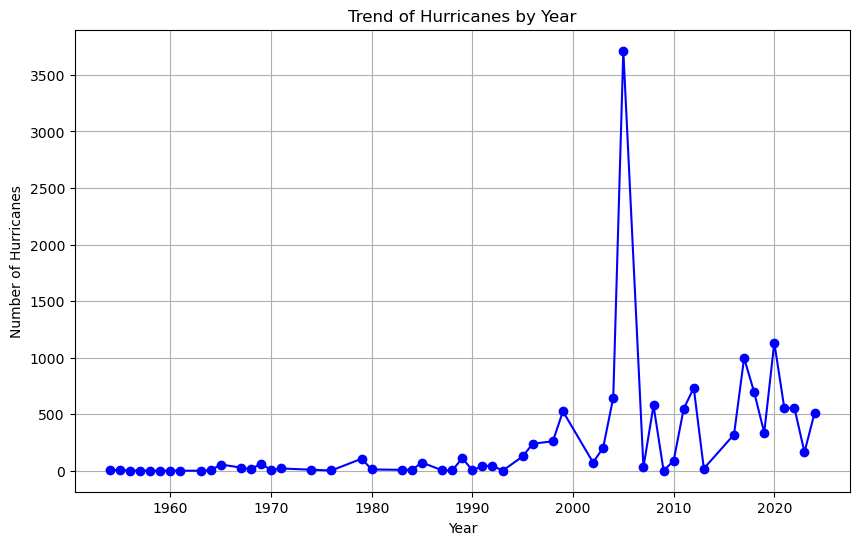

In [38]:
#Count Hurricane trend by year 
# Your original code, generating the count of incident types by year
hurricane_by_year = fema_disasters.groupby("declaration_year")["incidentType"].value_counts().sort_index()

# Filter for 'Huricanes' and create a new series for plotting
hurricane_data = hurricane_by_year.xs("Hurricane", level="incidentType")

# Plotting the data
hurricane_data.plot(kind='line', figsize=(10, 6), color='b', marker='o')

# Adding title and labels
plt.title('Trend of Hurricanes by Year')
plt.xlabel('Year')
plt.ylabel('Number of Hurricanes')
plt.grid(True)

# Show the plot
plt.show()

In [39]:
#Statistial Data on Sever Storme 
hurricane_describe = hurricane_data.describe()
hurricane_describe

count      54.000000
mean      254.092593
std       554.542826
min         1.000000
25%         5.500000
50%        43.500000
75%       306.000000
max      3714.000000
Name: count, dtype: float64

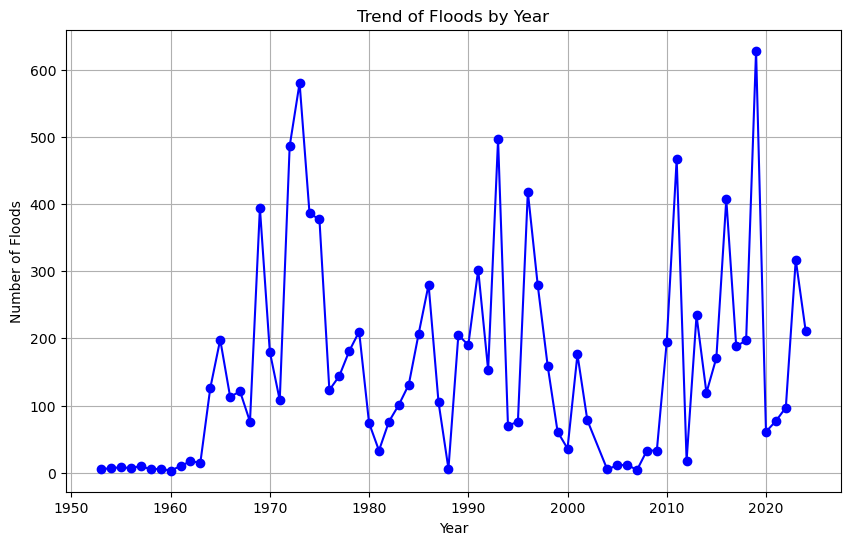

In [40]:
#Count Flood trend by year 
# Your original code, generating the count of incident types by year
flood_by_year = fema_disasters.groupby("declaration_year")["incidentType"].value_counts().sort_index()

# Filter for 'Severe Storm' and create a new series for plotting
flood_data = flood_by_year.xs("Flood", level="incidentType")

# Plotting the data
flood_data.plot(kind='line', figsize=(10, 6), color='b', marker='o')

# Adding title and labels
plt.title('Trend of Floods by Year')
plt.xlabel('Year')
plt.ylabel('Number of Floods')
plt.grid(True)

# Show the plot
plt.show()

In [41]:
#Statistial Data on Flood 
flood_data = flood_by_year.describe()
flood_data

count     476.000000
mean      124.161765
std       265.112165
min         1.000000
25%         5.000000
50%        25.500000
75%       121.500000
max      3714.000000
Name: count, dtype: float64

## Geoapify Geocoding API

In [28]:
# geoapify_base = 'https://api.geoapify.com/v1/geocode/search?'
# geoapify_params = {
#     'apiKey': api_keys.geoapify_key
#     }
